## Working Notebook


In [1]:
# import python libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# open the first data file
title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# open the second data file
title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# open the third data file
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

Clean the first data frame: title_basics

In [5]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# rename columns for future merging
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)

In [7]:
# drop columns not being used for analysis
title_basics.drop(columns = ["original_title","runtime_minutes"], inplace=True)

In [8]:
# calculate percentage of nulls in genre
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tconst      146144 non-null  object
 1   movie       146144 non-null  object
 2   start_year  146144 non-null  int64 
 3   genres      140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
title_basics['genres'].isna().sum()/146144*100

3.7004598204510617

In [10]:
# drop null values for genres
title_basics.dropna(subset= ['genres'], inplace = True)

In [11]:
title_basics.head()

,tconst,movie,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


Clean the third data frame: movie_budgets

In [12]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# change release date to date-time
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [14]:
# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
# drop id column
movie_budgets.drop(columns = ["id"], inplace=True)

In [16]:
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [17]:
# percentage of dropped 0s

In [18]:
# add a profit column to movie_budgets
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [19]:
# calculate profit in millions
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)

In [20]:
# calculate production budget in millions
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)

In [21]:
# add a column ROI calculating the return on investment
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100

In [22]:
# round ROI to 2 decimal places
movie_budgets = movie_budgets.round({'ROI': 2})

In [23]:
# add a column for movie year
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [24]:
movie_budgets.head()
movie_budgets.loc[movie_budgets['movie']== 'The Gambler']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year
2224,2014-12-10,The Gambler,25000000.0,33680992.0,38718031.0,13718031.0,13.718031,25.0,54.87,2014
4749,1999-08-04,The Gambler,3000000.0,51773.0,101773.0,-2898227.0,-2.898227,3.0,-96.61,1999


# Merging Data Tables

In [25]:
# merge title_basics and title_ratings on tconst
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()
imdb_data.loc[imdb_data['movie']== 'The Gambler']

,tconst,movie,start_year,genres,averagerating,numvotes
11283,tt1828325,The Gambler,2015,Drama,7.0,10
15523,tt2039393,The Gambler,2014,"Crime,Drama,Thriller",6.0,59995
29123,tt2843832,The Gambler,2013,Documentary,7.6,14
29833,tt2924336,The Gambler,2013,"Drama,Thriller",7.2,1479
72458,tt9447594,The Gambler,2019,"Action,Sci-Fi,Thriller",6.1,10


In [26]:
# merge imdb_data with movie_budgets
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')

In [27]:
mdf.shape

(2592, 15)

In [28]:
mdf=mdf.sort_values(by='numvotes', ascending = False)

In [29]:
mdf['same_year']= mdf['start_year']-mdf['year']

In [30]:
mdf = mdf.loc[mdf['same_year']== 0]

In [31]:
# drop duplicate titles
mdf = mdf.drop_duplicates(subset='movie')

In [32]:
# filter for movies released after 1990 
mdf = mdf.loc[mdf['year'] >= 1990]

In [33]:
# drop tconst, unnecessary after merge
mdf.drop(columns = ["tconst"], inplace=True)

In [34]:
mdf.shape

(1357, 15)

In [35]:
mdf_combined_genres = mdf[mdf['genres'].map(mdf['genres'].value_counts() >= 17)]

In [36]:
mdf_combined_genres['genres'].value_counts()

Adventure,Animation,Comedy    67
Action,Adventure,Sci-Fi       51
Comedy,Drama,Romance          49
Comedy                        48
Comedy,Drama                  42
Drama                         40
Comedy,Romance                40
Action,Crime,Drama            38
Drama,Romance                 32
Action,Adventure,Fantasy      31
Horror,Mystery,Thriller       29
Action,Comedy,Crime           29
Action,Adventure,Drama        26
Action,Crime,Thriller         21
Crime,Drama,Thriller          21
Drama,Thriller                21
Biography,Drama,History       20
Horror,Thriller               20
Action,Adventure,Comedy       20
Biography,Comedy,Drama        17
Name: genres, dtype: int64

In [37]:
662/1357

0.48784082535003687

The top 20 combined genres, which is about 10% of the combined genres, represent less than 50% of the movies in the data. For that reason, it will be more helpful to look at the movies separated into single genres.

# separating genres

In [38]:
# separate genres into lists
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [39]:
mdf.shape

(1357, 15)

In [40]:
mdf.head()

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
510,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,1841066,2010-07-16,160000000.0,292576195.0,8.355246e+08,6.755246e+08,675.524642,160.0,422.20,2010,0
477,The Dark Knight Rises,2012,"[Action, Thriller]",8.4,1387769,2012-07-20,275000000.0,448139099.0,1.084439e+09,8.094391e+08,809.439099,275.0,294.34,2012,0
96,Interstellar,2014,"[Adventure, Drama, Sci-Fi]",8.6,1299334,2014-11-05,165000000.0,188017894.0,6.663794e+08,5.013794e+08,501.379375,165.0,303.87,2014,0
1296,Django Unchained,2012,"[Drama, Western]",8.4,1211405,2012-12-25,100000000.0,162805434.0,4.499483e+08,3.499483e+08,349.948323,100.0,349.95,2012,0
110,The Avengers,2012,"[Action, Adventure, Sci-Fi]",8.1,1183655,2012-05-04,225000000.0,623279547.0,1.517936e+09,1.292936e+09,1292.935897,225.0,574.64,2012,0


In [41]:
#explode the genres
mdf2 = mdf.explode('genres')

In [42]:
mdf2['genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Family', 'Fantasy',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary'], dtype=object)

In [43]:
len(mdf2['genres'].unique())

21

In [44]:
mdf2.shape

(3530, 15)

In [45]:
mdf2.tail()

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
1418,Destiny,2014,Romance,7.8,36,2014-12-31,750000.0,0.0,450.0,-749550.0,-0.749550,0.750,-99.94,2014,0
1481,The Great Wall,2017,Documentary,6.5,24,2017-02-17,150000000.0,45157105.0,334486852.0,184486852.0,184.486852,150.000,122.99,2017,0
2308,Emily,2017,Drama,6.8,13,2017-01-27,27000.0,3547.0,3547.0,-23453.0,-0.023453,0.027,-86.86,2017,0
1931,All You Need Is Love,2014,Documentary,6.8,9,2014-10-31,300000.0,0.0,3565259.0,3265259.0,3.265259,0.300,1088.42,2014,0
2111,Oddball,2016,Documentary,6.4,5,2016-12-06,7000000.0,0.0,10237229.0,3237229.0,3.237229,7.000,46.25,2016,0


In [46]:
sorted_genres = mdf2.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top5genres = list(sorted_genres['genres'].values[0:5])
top5genres

['Horror', 'Mystery', 'Thriller', 'Sci-Fi', 'Animation']

In [47]:
sorted_genres

,genres,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
11,Horror,2014.173333,5.698000,76789.120000,2.037690e+07,3.621057e+07,7.939828e+07,5.902138e+07,59.021379,20.376900,971.286533,2014.173333,0.0
14,Mystery,2014.206897,6.173276,134106.379310,2.621925e+07,4.229281e+07,9.749718e+07,7.127794e+07,71.277938,26.219247,951.790259,2014.206897,0.0
18,Thriller,2013.758621,6.120690,132757.047414,3.553324e+07,4.913053e+07,1.275816e+08,9.204832e+07,92.048323,35.533244,597.271983,2013.758621,0.0
16,Sci-Fi,2014.388889,6.565873,286807.888889,9.956806e+07,1.329984e+08,3.647116e+08,2.651435e+08,265.143504,99.568056,283.657778,2014.388889,0.0
2,Animation,2014.193878,6.574490,128583.132653,1.001939e+08,1.407021e+08,3.887555e+08,2.885616e+08,288.561604,100.193878,278.690204,2014.193878,0.0
15,Romance,2013.072626,6.338547,82429.480447,2.310958e+07,3.410309e+07,7.047518e+07,4.736560e+07,47.365597,23.109581,267.470168,2013.072626,0.0
12,Music,2013.723404,6.389362,69891.170213,1.812872e+07,3.564235e+07,7.776171e+07,5.963299e+07,59.632989,18.128723,261.097021,2013.723404,0.0
3,Biography,2014.784615,7.051538,113389.415385,2.651900e+07,4.041363e+07,8.309290e+07,5.657390e+07,56.573903,26.519000,248.377846,2014.784615,0.0
7,Drama,2013.860360,6.596396,106750.448949,2.838700e+07,3.581019e+07,7.877166e+07,5.038466e+07,50.384662,28.386996,238.584444,2013.860360,0.0
4,Comedy,2013.627083,6.240625,98136.629167,4.240746e+07,6.237079e+07,1.424374e+08,1.000299e+08,100.029917,42.407458,228.190208,2013.627083,0.0


# Question 3

How does the amount of money invested into the movie (aka the production budget) impact the return on investment?

The relationship for all movies shown below.

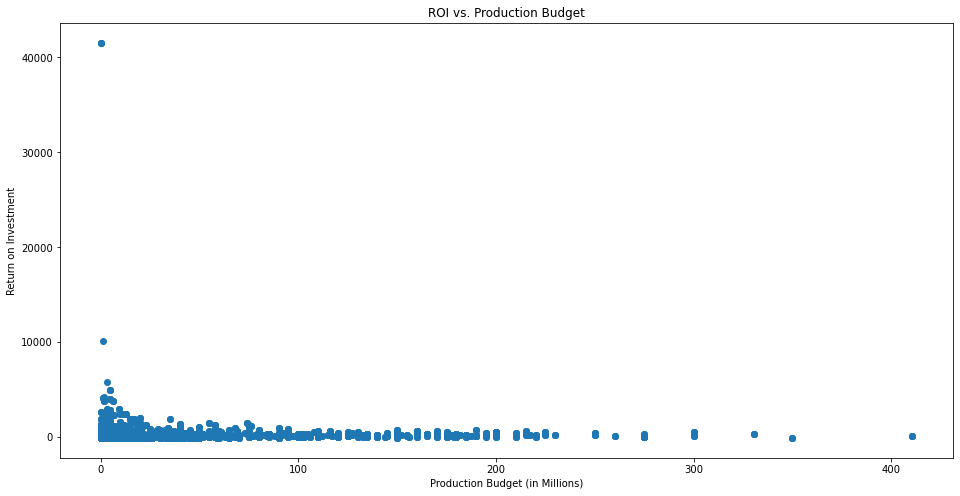

In [48]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(mdf2['production_budget_million'], mdf2['ROI'])
ax.set_title('ROI vs. Production Budget')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment');

The relationship between production budget and ROI representing only the top 5 genres.

In [49]:
top5genres

['Horror', 'Mystery', 'Thriller', 'Sci-Fi', 'Animation']

In [50]:
boolean_series = mdf2.genres.isin(top5genres)
filtered_top5_df = mdf2[boolean_series]
filtered_top5_df

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
510,Inception,2010,Sci-Fi,8.8,1841066,2010-07-16,160000000.0,292576195.0,8.355246e+08,6.755246e+08,675.524642,160.00,422.20,2010,0
477,The Dark Knight Rises,2012,Thriller,8.4,1387769,2012-07-20,275000000.0,448139099.0,1.084439e+09,8.094391e+08,809.439099,275.00,294.34,2012,0
96,Interstellar,2014,Sci-Fi,8.6,1299334,2014-11-05,165000000.0,188017894.0,6.663794e+08,5.013794e+08,501.379375,165.00,303.87,2014,0
110,The Avengers,2012,Sci-Fi,8.1,1183655,2012-05-04,225000000.0,623279547.0,1.517936e+09,1.292936e+09,1292.935897,225.00,574.64,2012,0
256,Shutter Island,2010,Mystery,8.1,1005960,2010-02-19,80000000.0,128012934.0,2.994618e+08,2.194618e+08,219.461782,80.00,274.33,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,The Word,2014,Thriller,4.9,344,2014-03-14,200000.0,3648.0,3.648000e+03,-1.963520e+05,-0.196352,0.20,-98.18,2014,0
350,Locker 13,2014,Thriller,4.7,290,2014-03-28,300000.0,3496.0,3.496000e+03,-2.965040e+05,-0.296504,0.30,-98.83,2014,0
1058,Raymond Did It,2011,Horror,3.3,211,2011-02-11,40000.0,3632.0,3.632000e+03,-3.636800e+04,-0.036368,0.04,-90.92,2011,0
1725,Windsor Drive,2015,Mystery,3.2,193,2015-08-28,850000.0,3256.0,3.256000e+03,-8.467440e+05,-0.846744,0.85,-99.62,2015,0


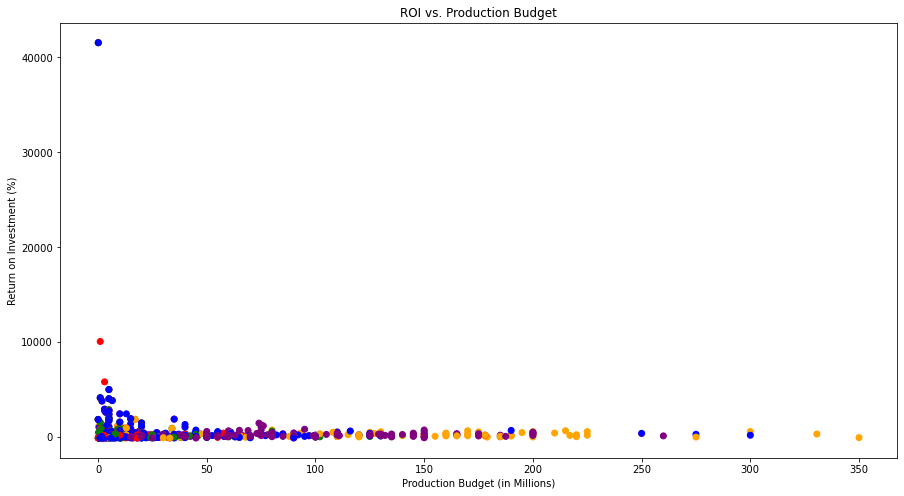

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
colors = {'Mystery':'green', 'Horror':'red', 'Thriller':'blue', 'Sci-Fi':'orange', 'Animation':'purple'}


ax.scatter(filtered_top5_df['production_budget_million'], filtered_top5_df['ROI'], c = filtered_top5_df['genres'].map(colors))
ax.set_title('ROI vs. Production Budget')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');

Looking at the relationship between production budget and ROI separated by individual top 5 genres.

In [52]:
genre1 = top5genres[0]
genre2 = top5genres[1]
genre3 = top5genres[2]
genre4 = top5genres[3]
genre5 = top5genres[4]

In [53]:
boolean_series1 = (mdf2['genres'] == genre1)
genre1_df = mdf2[boolean_series1]

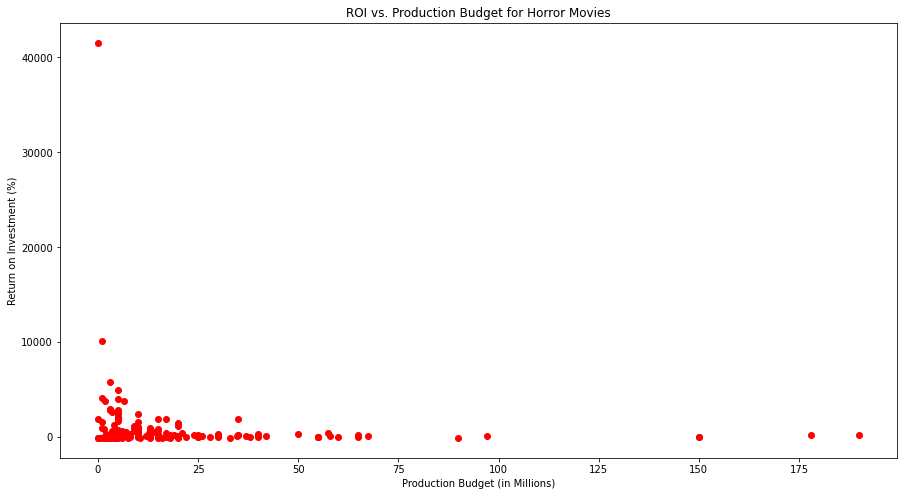

In [54]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(genre1_df['production_budget_million'], genre1_df['ROI'], c = 'red')
ax.set_title('ROI vs. Production Budget for Horror Movies')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');

In [55]:
boolean_series2 = (mdf2['genres'] == genre2)
genre2_df = mdf2[boolean_series2]

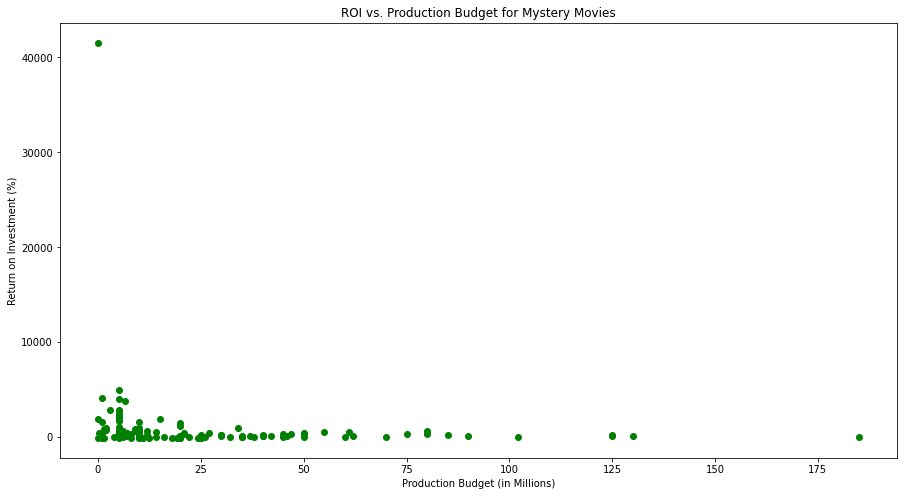

In [56]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(genre2_df['production_budget_million'], genre2_df['ROI'], c = 'green')
ax.set_title('ROI vs. Production Budget for Mystery Movies')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');

In [57]:
boolean_series3 = (mdf2['genres'] == genre3)
genre3_df = mdf2[boolean_series3]

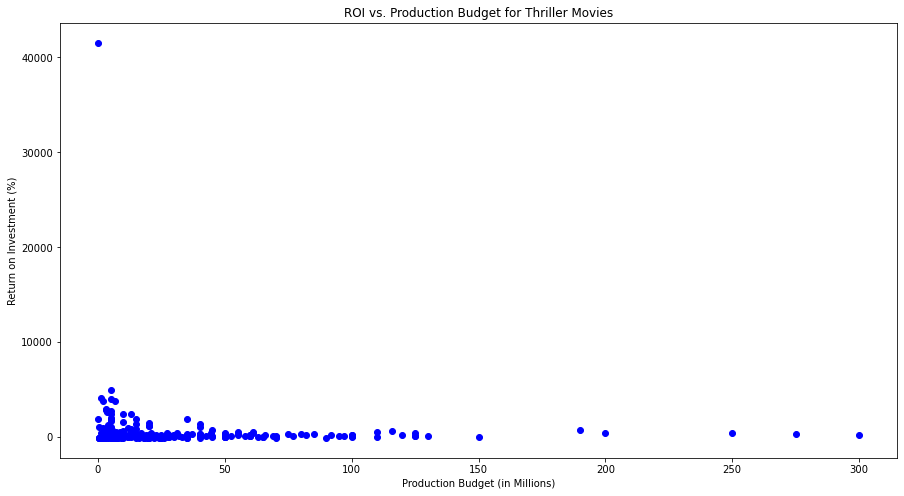

In [58]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(genre3_df['production_budget_million'], genre3_df['ROI'], c = 'blue')
ax.set_title('ROI vs. Production Budget for Thriller Movies')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');

In [59]:
boolean_series4 = (mdf2['genres'] == genre4)
genre4_df = mdf2[boolean_series4]

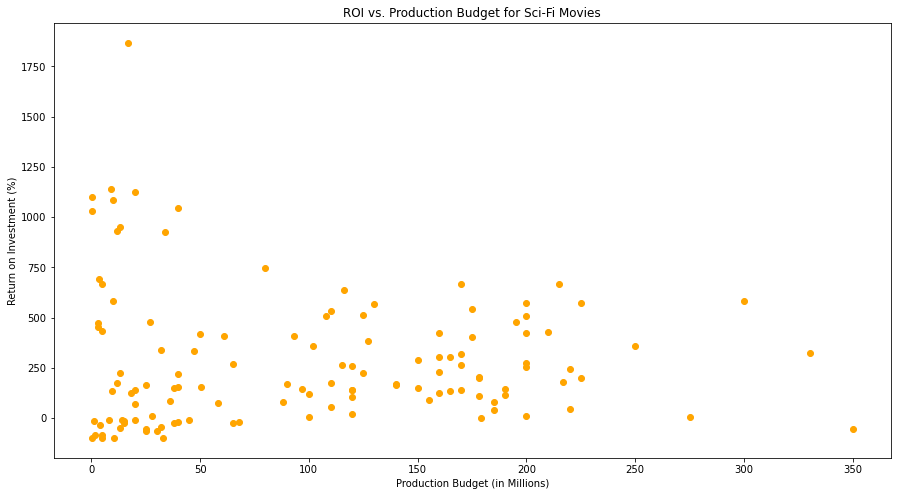

In [60]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(genre4_df['production_budget_million'], genre4_df['ROI'], c = 'orange')
ax.set_title('ROI vs. Production Budget for Sci-Fi Movies')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');

In [61]:
boolean_series5 = (mdf2['genres'] == genre5)
genre5_df = mdf2[boolean_series5]

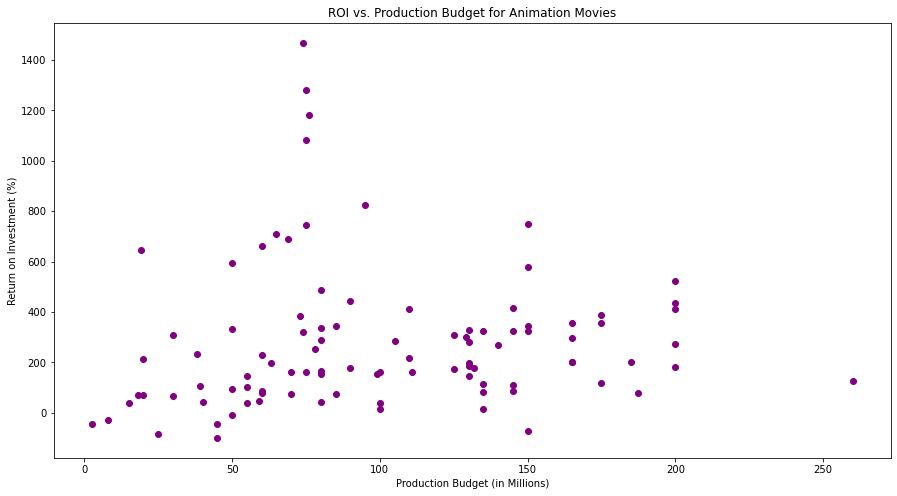

In [62]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(genre5_df['production_budget_million'], genre5_df['ROI'], c = 'purple')
ax.set_title('ROI vs. Production Budget for Animation Movies')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)');